In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.integrate as integrate
from financepy.models.black import *
from financepy.utils.global_types import *

####################################################################
#  FINANCEPY BETA Version 0.370 - This build: 28 Oct 2024 at 20:26 #
#     This software is distributed FREE AND WITHOUT ANY WARRANTY   #
#  Report bugs as issues at https://github.com/domokane/FinancePy  #
####################################################################



### Variance swap greeks profile

In [2]:
T = 0.25
DF = 1
DivF = 1
Ks = np.linspace(1, 180, 20)
dKs = np.zeros(Ks.size)
for i, K in enumerate(Ks):    
    if i > 0 and i < Ks.size-1:
        dKs[i] = (Ks[i+1] - Ks[i-1])/2
        
dKs = dKs[1:-1]
Ks = Ks[1:-1]
vol = 0.2
model = Black(vol)
Spots = np.linspace(10,200,150)
Forwards = [S*DivF/DF for S in Spots]
f0 = 100

print(Ks)

[ 10.42105263  19.84210526  29.26315789  38.68421053  48.10526316
  57.52631579  66.94736842  76.36842105  85.78947368  95.21052632
 104.63157895 114.05263158 123.47368421 132.89473684 142.31578947
 151.73684211 161.15789474 170.57894737]


In [3]:
df_dollargamma = pd.DataFrame(Spots, columns=['Spots'])
df_delta = pd.DataFrame(Spots, columns=['Spots'])
df_vega = pd.DataFrame(Spots, columns=['Spots'])

for i, dK in enumerate(dKs):
    K = Ks[i]
    weight = 2*dK/(K*K)/T    
    if K > f0:
        callOrPut = OptionTypes.EUROPEAN_CALL
    else:
        callOrPut = OptionTypes.EUROPEAN_PUT
    
    dollargamma = [weight * model.gamma(f, K, T, DF, callOrPut) * f * f for f in Forwards]    
    df_dollargamma['K='+str(round(K,0))] = dollargamma
    
    delta = [weight * model.delta(f, K, T, DF, callOrPut) for f in Forwards]    
    df_delta['K='+str(round(K,0))] = delta
    
    vega = [weight * model.vega(f, K, T, DF, callOrPut) for f in Forwards]    
    df_vega['K='+str(round(K,0))] = vega   

df_dollargamma = df_dollargamma.set_index('Spots')
df_delta = df_delta.set_index('Spots')
df_vega = df_vega.set_index('Spots')
df_dollargamma['sum'] = df_dollargamma.sum(axis=1)
df_delta['sum'] = df_delta.sum(axis=1)
df_vega['sum'] = df_vega.sum(axis=1)

Text(0, 0.5, 'Dollar Gamma')

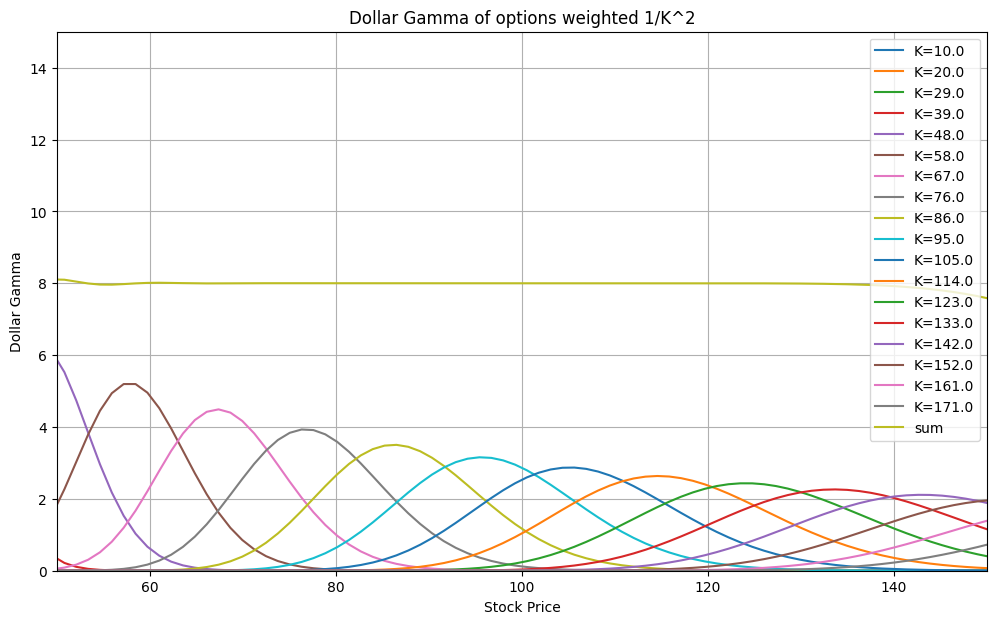

In [4]:
ax = df_dollargamma.plot(grid=True, figsize=(12, 7))
ax.set_xlim(50, 150)
ax.set_ylim(0, 15)
plt.title("Dollar Gamma of options weighted 1/K^2")
plt.xlabel("Stock Price")
plt.ylabel("Dollar Gamma")
#plt.savefig("L6_varswap_dollargamma.png")

Text(0, 0.5, 'Delta')

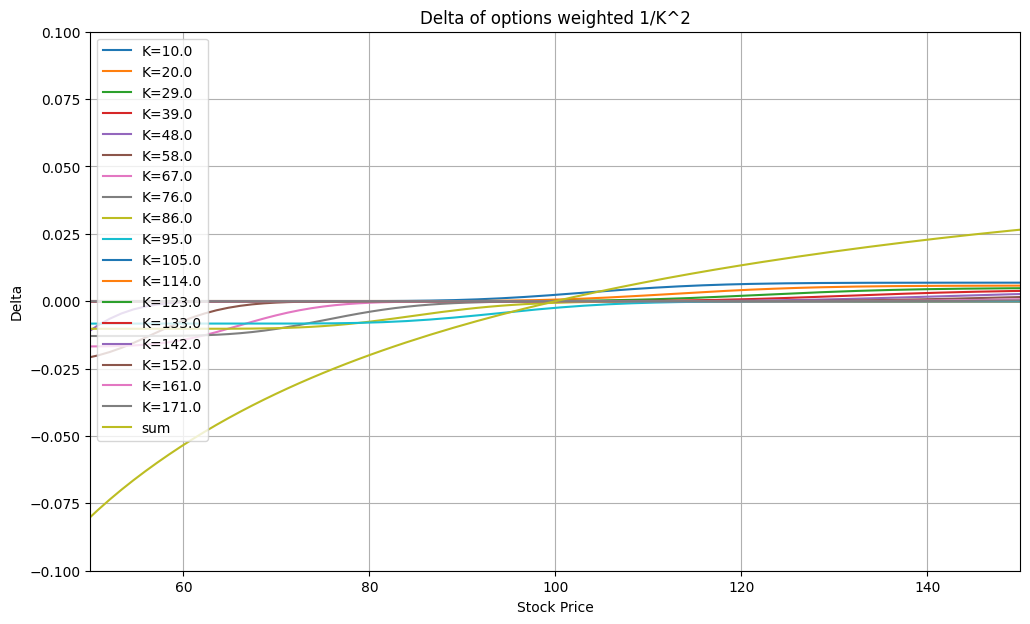

In [5]:
ax = df_delta.plot(grid=True, figsize=(12, 7))
ax.set_xlim(50, 150)
ax.set_ylim(-0.1, 0.1)
plt.title("Delta of options weighted 1/K^2")
plt.xlabel("Stock Price")
plt.ylabel("Delta")
#plt.savefig("L6_varswap_delta.png")

Text(0, 0.5, 'Vega')

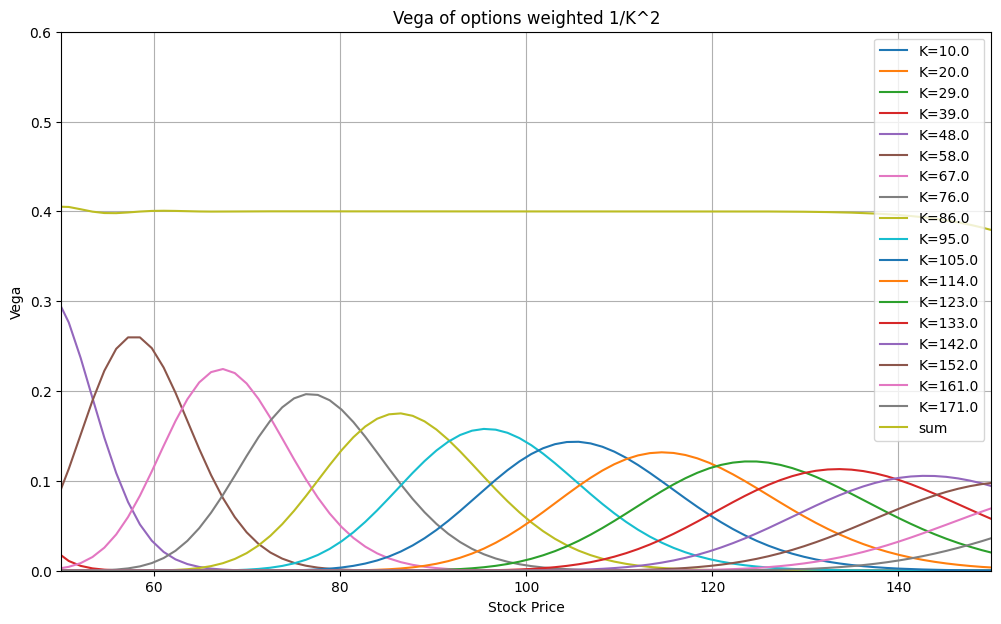

In [6]:
ax = df_vega.plot(grid=True, figsize=(12, 7))
ax.set_xlim(50, 150)
ax.set_ylim(0, 0.6)
plt.title("Vega of options weighted 1/K^2")
plt.xlabel("Stock Price")
plt.ylabel("Vega")
#plt.savefig("L6_varswap_vega.png")